# 5.1 K-means

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com

The general problem of grouping data points into clusters, where data points in the same cluster are more similar than data points in different clusters, is known as clustering. There are a number of other approaches, most notably an algorithm called K-means.


To process the learning data, the K-means algorithm in data starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. It halts creating and optimizing clusters when either: The centroids have stabilized — there is no change in their values because the clustering has been successful. The defined number of iterations has been achieved.

![pca gif](static/Kmeans.gif)

**Example 1:**
____

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA as skLearnPCA
from sklearn.metrics import euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score
pd.set_option('max_colwidth',100)
plt.style.use('seaborn-paper')
plt.style.use('seaborn')

In [2]:
run MvaUtils.py

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


/home/eaguilar/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


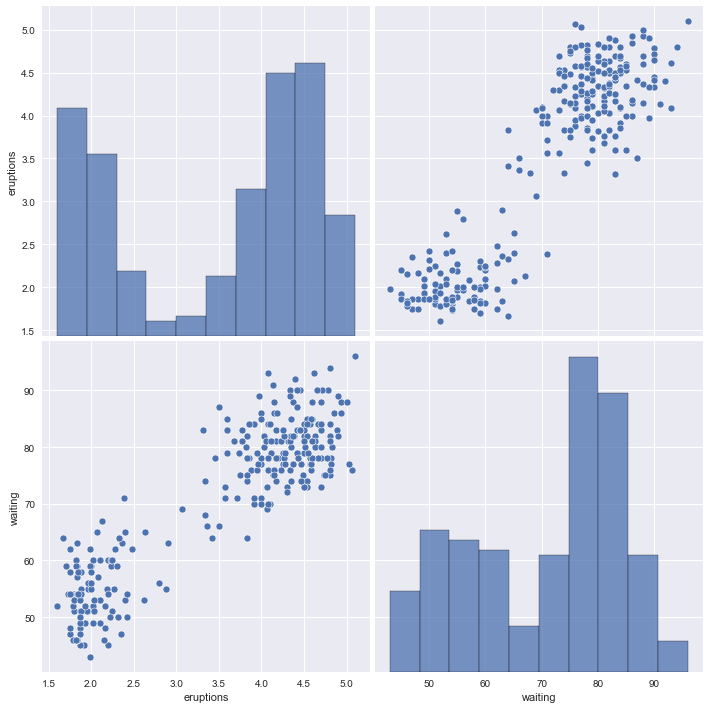

In [3]:
features = ['eruptions','waiting']
eruptions_df = pd.read_csv('DataSets/eruptions.csv')[features]
display(eruptions_df)
sns.pairplot(eruptions_df,size=5)

,k,inertia
0,1,50440.157025
1,2,8901.768721
2,3,5188.540468
3,4,2941.720903
4,5,2036.834764
5,6,1458.905835
6,7,1019.757800
7,8,801.167884
8,9,642.074834
9,10,536.846465


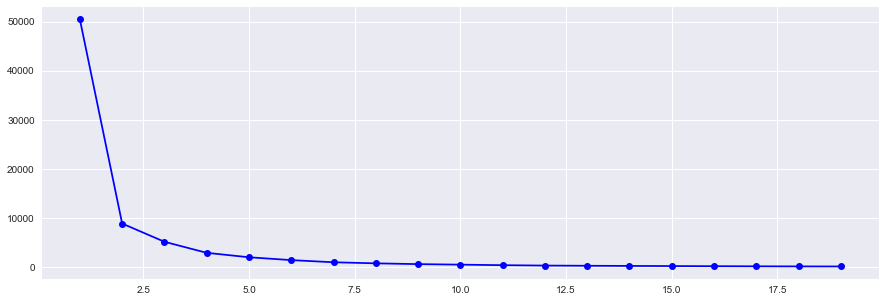

In [5]:
from sklearn.cluster import KMeans
intertias = []
for k in list(range(1,20)):
    kmeans = KMeans(n_clusters=k).fit(eruptions_df)
    intertias.append([k,kmeans.inertia_])
intertias_df = pd.DataFrame(intertias,columns=['k','inertia'])
display(intertias_df)
plt.figure(figsize=(15,5))
plt.plot(intertias_df['k'].values,intertias_df['inertia'].values,'b-o')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=2).fit(eruptions_df[features])

eruptions_df['grupo'] = kmeans.predict(eruptions_df[features])
eruptions_df['grupo'] = eruptions_df['grupo'].apply(lambda row: 'grupo_'+str(row))
eruptions_df['silhouette'] = silhouette_samples(eruptions_df[features], eruptions_df['grupo'])
eruptions_df

,eruptions,waiting,grupo,silhouette
0,3.600,79,grupo_0,0.804396
1,1.800,54,grupo_1,0.813737
2,3.333,74,grupo_0,0.630708
3,2.283,62,grupo_1,0.564083
4,4.533,85,grupo_0,0.796713
...,...,...,...,...
267,4.117,81,grupo_0,0.824602
268,2.150,46,grupo_1,0.738537
269,4.417,90,grupo_0,0.716608
270,1.817,46,grupo_1,0.738929


/home/eaguilar/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


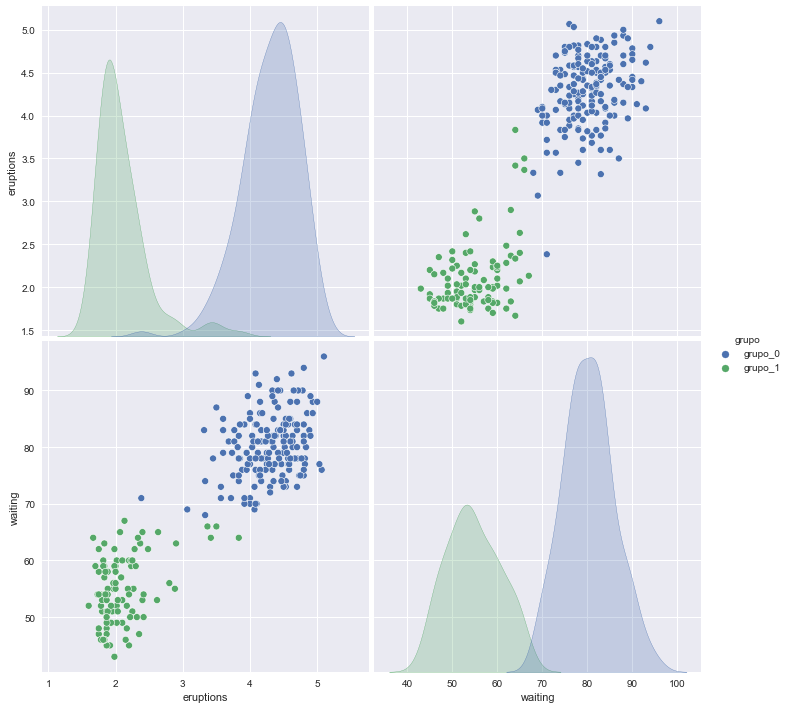

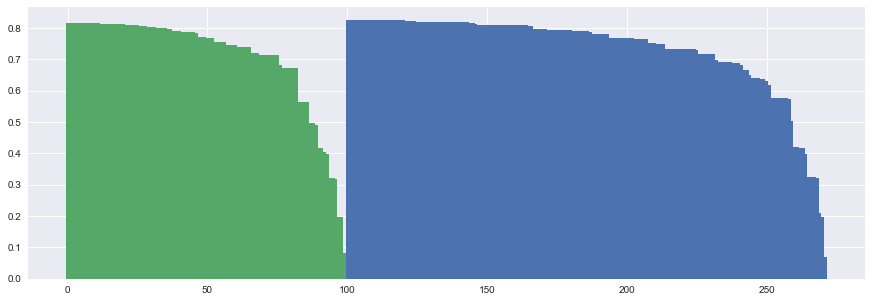

In [8]:
sns.pairplot(eruptions_df[features+['grupo']],hue='grupo',size=5)
grupos = list(eruptions_df['grupo'].unique())
eruptions_df = eruptions_df.sort_values(['grupo','silhouette'],ascending=False)
eruptions_df = eruptions_df.reset_index().reset_index()

plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = eruptions_df[eruptions_df['grupo']==grupo]
    plt.bar(group_df['level_0'],group_df['silhouette'],width=1)

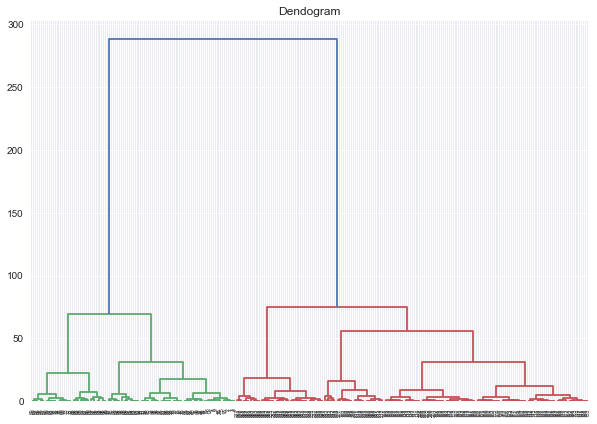

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(eruptions_df[features], method='ward'))  

**Example 2:**
____

/home/eaguilar/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


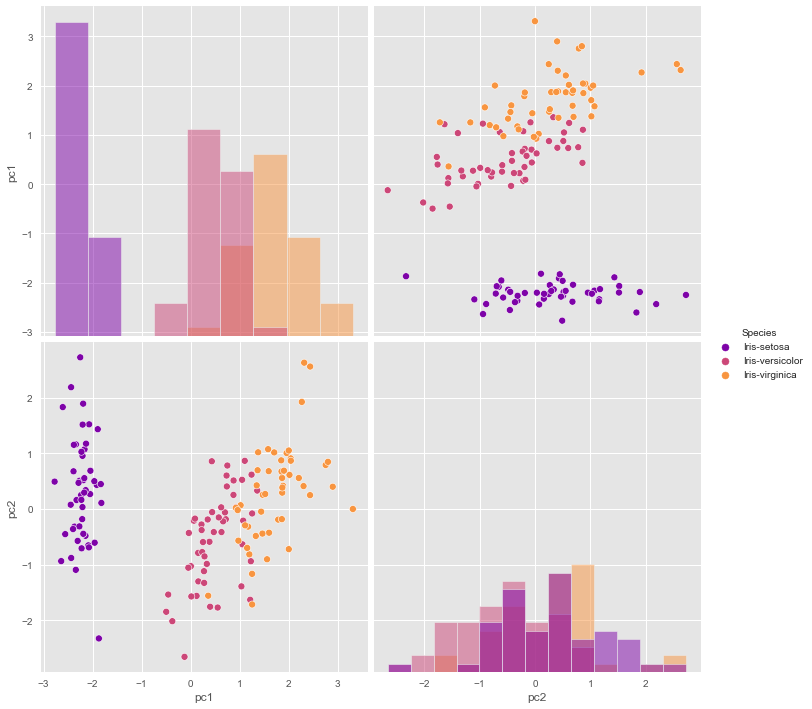

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('ggplot')
import seaborn as sns

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
keys = ['Species']
irisPath = 'DataSets/Iris.csv'
irisPD = pd.read_csv(irisPath)

X = irisPD.loc[:,features].values
Y = irisPD.loc[:,keys].values
ss = StandardScaler(with_mean=True,with_std=True).fit(X)
centeredIrisX = ss.transform(X) 

pd.DataFrame(centeredIrisX)


k=2
pcaIrisCols = ['pc'+str(i+1) for i in range(0,k)]
pcaIrisModel = PCA(n_components=k).fit(centeredIrisX)
transformedIrisDataPD = pd.DataFrame(data=pcaIrisModel.transform(centeredIrisX),columns=pcaIrisCols)
pcaIrisPD = pd.concat([irisPD,transformedIrisDataPD],axis=1)
pcaIrisPD[:5]

smpc = sns.pairplot(pcaIrisPD[keys+pcaIrisCols],hue="Species",diag_kind='hist',palette="plasma",size=5)

,k,inertia
0,1,574.805852
1,2,198.706836
2,3,116.109240
3,4,89.730095
4,5,66.370581
5,6,57.316265
6,7,47.870047
7,8,39.148731
8,9,32.391813
9,10,28.117137


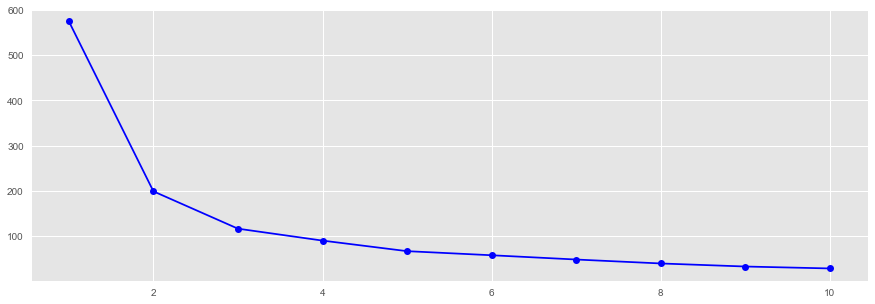

In [11]:
intertias = []
for k in list(range(1,11)):
    kmeans = KMeans(n_clusters=k).fit(pcaIrisPD[pcaIrisCols])
    intertias.append([k,kmeans.inertia_])
intertias_df = pd.DataFrame(intertias,columns=['k','inertia'])
display(intertias_df)
plt.figure(figsize=(15,5))
plt.plot(intertias_df['k'].values,intertias_df['inertia'].values,'b-o')
plt.show()

/home/eaguilar/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


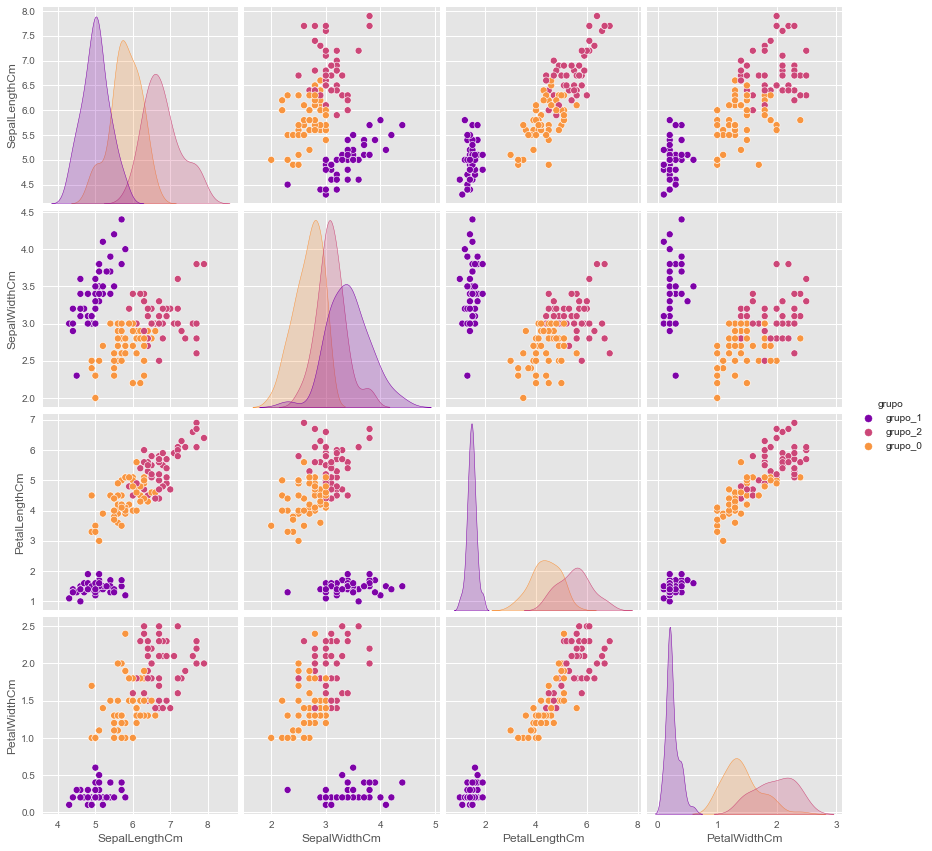

In [12]:
kmeans = KMeans(n_clusters=3).fit(pcaIrisPD[pcaIrisCols])
pcaIrisPD['grupo'] = kmeans.predict(pcaIrisPD[pcaIrisCols])
pcaIrisPD['grupo'] = pcaIrisPD['grupo'].apply(lambda row: 'grupo_'+str(row))
sns.pairplot(pcaIrisPD[features+['grupo']],hue='grupo',size=3,palette="plasma")

In [13]:
pcaIrisPD.groupby(['grupo','Species']).count()

SepalLengthCm  SepalWidthCm  PetalLengthCm  \
grupo   Species                                                       
grupo_0 Iris-versicolor             39            39             39   
        Iris-virginica              14            14             14   
grupo_1 Iris-setosa                 50            50             50   
grupo_2 Iris-versicolor             11            11             11   
        Iris-virginica              36            36             36   

                         PetalWidthCm  pc1  pc2  
grupo   Species                                  
grupo_0 Iris-versicolor            39   39   39  
        Iris-virginica             14   14   14  
grupo_1 Iris-setosa                50   50   50  
grupo_2 Iris-versicolor            11   11   11  
        Iris-virginica             36   36   36

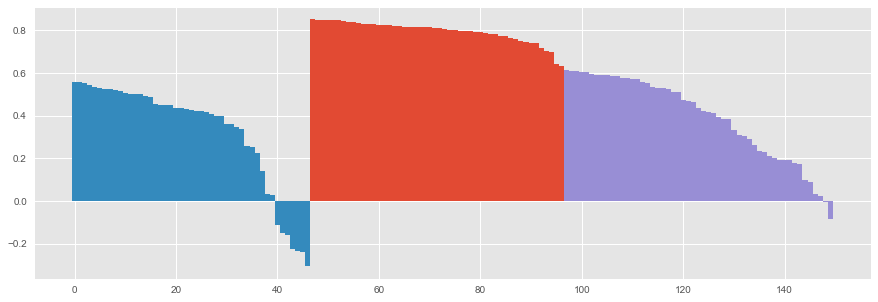

In [14]:
grupos = list(pcaIrisPD['grupo'].unique())
pcaIrisPD['silhouette'] = silhouette_samples(pcaIrisPD[features], pcaIrisPD['grupo'])
pcaIrisPD = pcaIrisPD.sort_values(['grupo','silhouette'],ascending=False)
pcaIrisPD = pcaIrisPD.reset_index().reset_index()
#pcaIrisPD['grupo'] = pcaIrisPD['grupo'].apply(lambda row: np.random.choice(['grupo_0','grupo_1']))
plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = pcaIrisPD[pcaIrisPD['grupo']==grupo]
    plt.bar(group_df['level_0'],group_df['silhouette'],width=1)

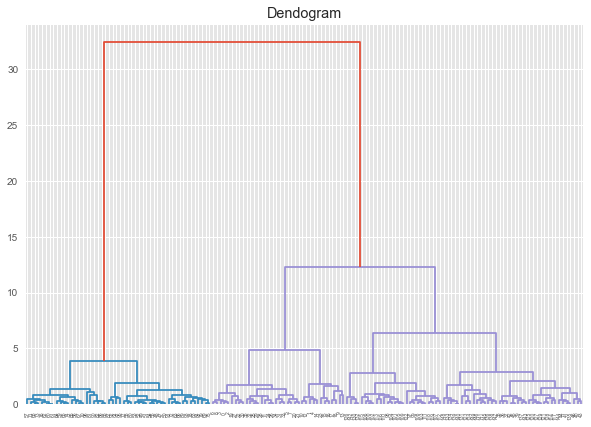

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(pcaIrisPD[features], method='ward'))  

In [16]:
X_new = [[1,2,1,1]]
X_new_std = ss.transform(X=X_new)
X_new_pca = pcaIrisModel.transform(X_new_std)
X_grupo = kmeans.predict(pd.DataFrame(X_new_pca,columns=['pc1','pc2']))
X_grupo

array([1], dtype=int32)

**Example 3:**

,0,foo
0,mono,1
1,tono,1
2,lomo,1
3,domo,1
4,cono,1
5,raiz,1
6,maiz,1
7,nariz,1
8,pais,1


/tmp/ipykernel_668749/3685079175.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cartesian = wordsPD.merge(wordsPD,on='foo').drop('foo', 1).values


array([['mono', 'mono'],
       ['mono', 'tono'],
       ['mono', 'lomo'],
       ['mono', 'domo'],
       ['mono', 'cono'],
       ['mono', 'raiz'],
       ['mono', 'maiz'],
       ['mono', 'nariz'],
       ['mono', 'pais'],
       ['tono', 'mono'],
       ['tono', 'tono'],
       ['tono', 'lomo'],
       ['tono', 'domo'],
       ['tono', 'cono'],
       ['tono', 'raiz'],
       ['tono', 'maiz'],
       ['tono', 'nariz'],
       ['tono', 'pais'],
       ['lomo', 'mono'],
       ['lomo', 'tono'],
       ['lomo', 'lomo'],
       ['lomo', 'domo'],
       ['lomo', 'cono'],
       ['lomo', 'raiz'],
       ['lomo', 'maiz'],
       ['lomo', 'nariz'],
       ['lomo', 'pais'],
       ['domo', 'mono'],
       ['domo', 'tono'],
       ['domo', 'lomo'],
       ['domo', 'domo'],
       ['domo', 'cono'],
       ['domo', 'raiz'],
       ['domo', 'maiz'],
       ['domo', 'nariz'],
       ['domo', 'pais'],
       ['cono', 'mono'],
       ['cono', 'tono'],
       ['cono', 'lomo'],
       ['cono', 'domo

array([['mono', 'mono'],
       ['mono', 'tono'],
       ['mono', 'lomo'],
       ['mono', 'domo'],
       ['mono', 'cono'],
       ['mono', 'raiz'],
       ['mono', 'maiz'],
       ['mono', 'nariz'],
       ['mono', 'pais'],
       ['tono', 'mono'],
       ['tono', 'tono'],
       ['tono', 'lomo'],
       ['tono', 'domo'],
       ['tono', 'cono'],
       ['tono', 'raiz'],
       ['tono', 'maiz'],
       ['tono', 'nariz'],
       ['tono', 'pais'],
       ['lomo', 'mono'],
       ['lomo', 'tono'],
       ['lomo', 'lomo'],
       ['lomo', 'domo'],
       ['lomo', 'cono'],
       ['lomo', 'raiz'],
       ['lomo', 'maiz'],
       ['lomo', 'nariz'],
       ['lomo', 'pais'],
       ['domo', 'mono'],
       ['domo', 'tono'],
       ['domo', 'lomo'],
       ['domo', 'domo'],
       ['domo', 'cono'],
       ['domo', 'raiz'],
       ['domo', 'maiz'],
       ['domo', 'nariz'],
       ['domo', 'pais'],
       ['cono', 'mono'],
       ['cono', 'tono'],
       ['cono', 'lomo'],
       ['cono', 'domo

levenshtein                                         
word2        cono domo lomo maiz mono nariz pais raiz tono
word1                                                     
cono            0    2    2    4    1     5    4    4    1
domo            2    0    1    4    2     5    4    4    2
lomo            2    1    0    4    2     5    4    4    2
maiz            4    4    4    0    3     2    2    1    4
mono            1    2    2    3    0     5    4    4    1
nariz           5    5    5    2    5     0    3    2    5
pais            4    4    4    2    4     3    0    2    4
raiz            4    4    4    1    4     2    2    0    4
tono            1    2    2    4    1     5    4    4    0

,word,x1,x2
0,cono,-2.115673,-0.215394
1,domo,-1.399319,1.580180
2,lomo,-1.752743,1.298461
3,maiz,1.824294,-0.258448
4,mono,-1.507451,-0.334011
5,nariz,2.906822,-1.710077
6,pais,2.093969,1.209636
7,raiz,1.890561,-0.794160
8,tono,-1.940461,-0.776187


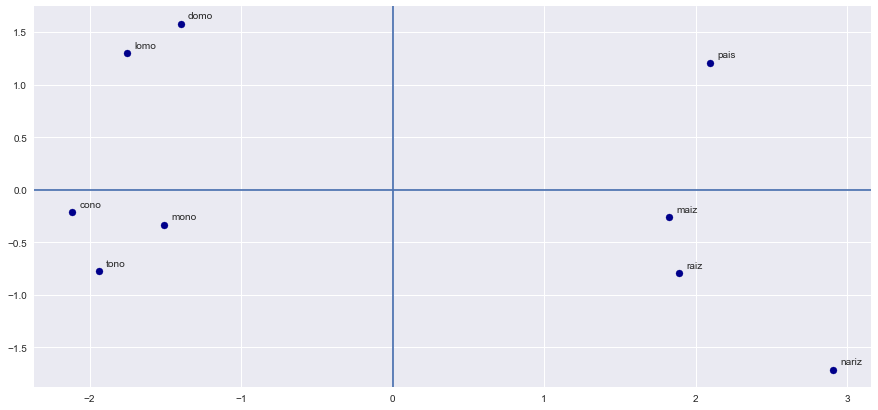

In [17]:
def levenshtein(str1, str2):
  d=dict()
  for i in range(len(str1)+1):
     d[i]=dict()
     d[i][0]=i
  for i in range(len(str2)+1):
     d[0][i] = i
  for i in range(1, len(str1)+1):
     for j in range(1, len(str2)+1):
        d[i][j] = min(d[i][j-1]+1, d[i-1][j]+1, d[i-1][j-1]+(not str1[i-1] == str2[j-1]))
  return d[len(str1)][len(str2)]

words = ['looney','coney','money','donkey','honey','mark','park','dark','shark','spark']
words = ['mono','tono','lomo','domo','cono','raiz','maiz','nariz','pais']

cols=['word1','word2','levenshtein']

wordsPD =  pd.DataFrame(words).assign(foo=1)
display(wordsPD)
cartesian = wordsPD.merge(wordsPD,on='foo').drop('foo', 1).values
display(cartesian)
distances = map(lambda x: [x[0],x[1],levenshtein(x[0],x[1])], cartesian)
display(cartesian)
distanceMatrixDF = pd.DataFrame(list(distances),columns=cols)\
                     .pivot(index='word1',columns='word2')

display(distanceMatrixDF)

cols = ['x1','x2']
mdsWordsVectors = manifold.MDS(n_components=2,dissimilarity='precomputed',random_state=5)\
                     .fit_transform(distanceMatrixDF.values)

mapWordsPD = pd.DataFrame(mdsWordsVectors,columns=cols)
mapWordsPD['word'] = list(distanceMatrixDF.reset_index()['word1'])

display(mapWordsPD[['word','x1','x2']])

plt.style.use('seaborn')
plt.figure(figsize=(15,7))
scatterPlot(plt,mapWordsPD,'x1','x2','darkblue',label='word')

,x1,x2,word,grupo,silhouette
0,-2.115673,-0.215394,cono,grupo_0,0.734211
1,-1.399319,1.580180,domo,grupo_0,0.597609
2,-1.752743,1.298461,lomo,grupo_0,0.671790
3,1.824294,-0.258448,maiz,grupo_1,0.657192
4,-1.507451,-0.334011,mono,grupo_0,0.685919
5,2.906822,-1.710077,nariz,grupo_1,0.598330
6,2.093969,1.209636,pais,grupo_1,0.461134
7,1.890561,-0.794160,raiz,grupo_1,0.665929
8,-1.940461,-0.776187,tono,grupo_0,0.665546


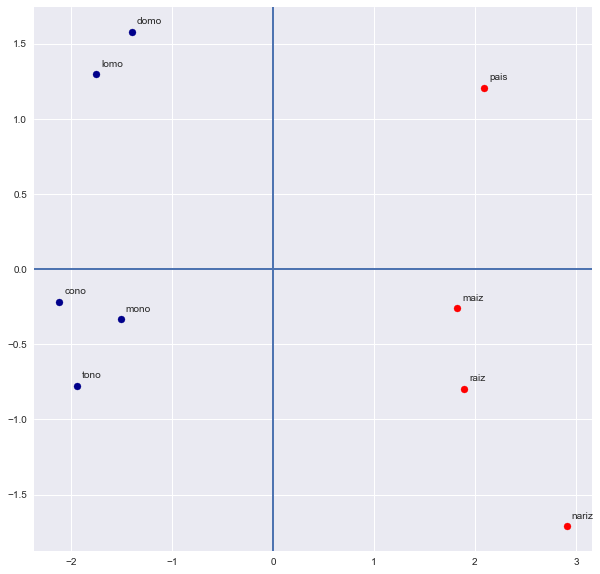

In [18]:
features = ['x1','x2']
kmeans = KMeans(n_clusters=2).fit(mapWordsPD[features])
mapWordsPD['grupo'] = kmeans.predict(mapWordsPD[features])
mapWordsPD['grupo'] = mapWordsPD['grupo'].apply(lambda row: 'grupo_'+str(row))
mapWordsPD['silhouette'] = silhouette_samples(mapWordsPD[features], mapWordsPD['grupo'])
plt.figure(figsize=(10,10))
scatterPlot(plt,mapWordsPD[mapWordsPD['grupo']=='grupo_0'],'x1','x2','darkblue',label='word')
scatterPlot(plt,mapWordsPD[mapWordsPD['grupo']=='grupo_1'],'x1','x2','red',label='word')
mapWordsPD

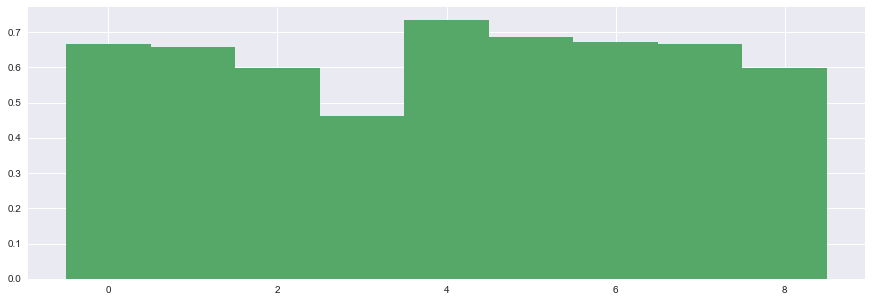

In [19]:
grupos = list(mapWordsPD['grupo'].unique())
mapWordsPD_s = mapWordsPD.sort_values(['grupo','silhouette'],ascending=False)
mapWordsPD_s = mapWordsPD_s.reset_index().reset_index()
plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = mapWordsPD_s[mapWordsPD_s['grupo']==grupo]
    plt.bar(mapWordsPD_s['level_0'],mapWordsPD_s['silhouette'],width=1)

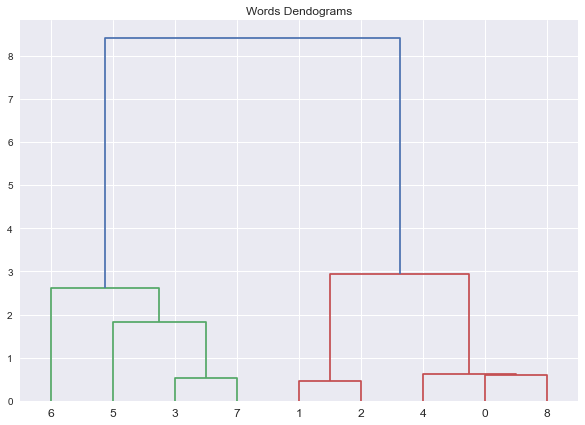

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Words Dendograms")
dend = shc.dendrogram(shc.linkage(mapWordsPD[features], method='ward'))